<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


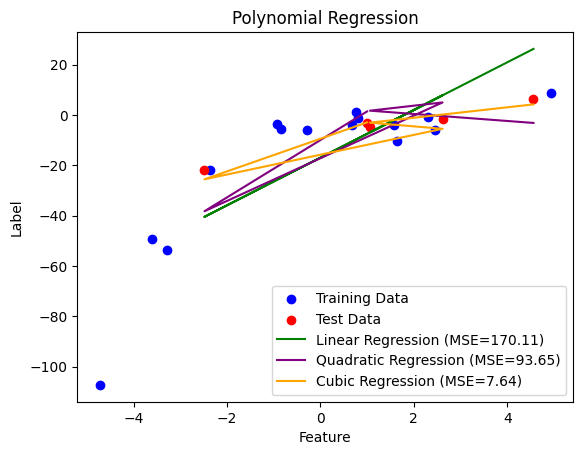

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Numerical_methods/data.csv'
data = pd.read_csv(file_path, header=None);


X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

# training and testing
train_size = 15
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Linear reg func
def linear_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X_extended = np.hstack((ones, X))
    theta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
    return theta

theta_linear = linear_regression(X_train, y_train)

# Quadratic reg func
def quadratic_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X_squared = X**2
    X_extended = np.hstack((ones, X, X_squared))
    theta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
    return theta

theta_quadratic = quadratic_regression(X_train, y_train)

# Cubic reg func
def cubic_regression(X, y):
    ones = np.ones((X.shape[0], 1))
    X_squared = X**2
    X_cubed = X**3
    X_extended = np.hstack((ones, X, X_squared, X_cubed))
    theta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
    return theta

theta_cubic = cubic_regression(X_train, y_train)

# Predictions on test set
def predict(X, theta):
    ones = np.ones((X.shape[0], 1))
    if len(theta) == 2:
        X_extended = np.hstack((ones, X))
    elif len(theta) == 3:
        X_squared = X**2
        X_extended = np.hstack((ones, X, X_squared))
    elif len(theta) == 4:
        X_squared = X**2
        X_cubed = X**3
        X_extended = np.hstack((ones, X, X_squared, X_cubed))
    y_pred = X_extended @ theta
    return y_pred

y_pred_linear = predict(X_test, theta_linear)# Q1
y_pred_quadratic = predict(X_test, theta_quadratic)# Q2
y_pred_cubic = predict(X_test, theta_cubic)# Q3

# For MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)
mse_cubic = mean_squared_error(y_test, y_pred_cubic)

# For the Graph
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred_linear, color='green', label=f'Linear Regression (MSE={mse_linear:.2f})')
plt.plot(X_test, y_pred_quadratic, color='purple', label=f'Quadratic Regression (MSE={mse_quadratic:.2f})')
plt.plot(X_test, y_pred_cubic, color='orange', label=f'Cubic Regression (MSE={mse_cubic:.2f})')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Polynomial Regression')
plt.show()